In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
from random import randint
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

## 1. Image Preparation for Convolutional Neural Network with TensorFlow's Keras API

Dataset: https://github.com/ardamavi/Sign-Language-Digits-Dataset
   
  • 10 classes (digits 0-9)
  
  • class data:
  
         • class 0: 205 images
         • class 1: 206 images
         • class 2: 206 imageS
         • class 3: 206 images
         • class 4: 207 images
         • class 5: 207 images
         • class 6: 207 images
         • class 7: 206 images
         • class 8: 208 images
         • class 9: 204 images
         
Download data and save in current directory/data/Sign-Language-Digits-Dataset. Extract sub-directories labeled 0 through 9 and nest directories directly underneath Sign-Language-Digits-Dataset directory. Directory structure should look like this:

  
  • data/
  
         • Sign-Language-Digits-Dataset/
             ○  0/
             ○  1/
             ○  2/
             ○  ...
             ○  9/  

In [2]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\0')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\0') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\0')
    
    for i in random.sample(glob.glob('*'), 136):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\0')  
os.chdir('../../')

# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\1')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\1') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\1')
    
    for i in random.sample(glob.glob('*'), 136):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\1')  
os.chdir('../../')

# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\2')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\2') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\2')
    
    for i in random.sample(glob.glob('*'), 136):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\2')  
os.chdir('../../')

# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\3')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\3') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\3')
    
    for i in random.sample(glob.glob('*'), 136):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\3')  
os.chdir('../../')

# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\4')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\4') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\4')
    
    for i in random.sample(glob.glob('*'), 136):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\4')  
os.chdir('../../')

# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\5')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\5') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\5')
    
    for i in random.sample(glob.glob('*'), 136):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\5')  
os.chdir('../../')

# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\6')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\6') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\6')
    
    for i in random.sample(glob.glob('*'), 136):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\6')  
os.chdir('../../')

# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\7')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\7') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\7')
    
    for i in random.sample(glob.glob('*'), 136):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\7')  
os.chdir('../../')

# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\8')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\8') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\8')
    
    for i in random.sample(glob.glob('*'), 136):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\8')  
os.chdir('../../')

# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\9')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\9') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\9')
    
    for i in random.sample(glob.glob('*'), 136):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\9')  
os.chdir('../../')

In [3]:
# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\0')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\0') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\0')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\0')  
os.chdir('../../')

# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\1')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\1') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\1')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\1')  
os.chdir('../../')

# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\2')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\2') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\2')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\2')  
os.chdir('../../')

# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\3')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\3') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\3')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\3')  
os.chdir('../../')

# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\4')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\4') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\4')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\4')  
os.chdir('../../')

# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\5')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\5') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\5')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\5')  
os.chdir('../../')

# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\6')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\6') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\6')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\6')  
os.chdir('../../')

# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\7')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\7') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\7')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\7')  
os.chdir('../../')

# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\8')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\8') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\8')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\8')  
os.chdir('../../')

# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\9')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\9') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\9')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\9')  
os.chdir('../../')

In [4]:
train_path = 'C:\\Users\\רועי\\\data\\Sign-Language-Digits-Dataset\\train'
valid_path = 'C:\\Users\\רועי\\\data\\Sign-Language-Digits-Dataset\\valid'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['0','1','2','3','4','5','6','7','8','9'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['0','1','2','3','4','5','6','7','8','9'], batch_size=10)

Found 1360 images belonging to 10 classes.
Found 270 images belonging to 10 classes.


In [6]:
assert train_batches.n == 1360
assert valid_batches.n == 270
assert train_batches.num_classes == valid_batches.num_classes == 10

In [7]:
# plot images in the form of a 1 by 10 grid and resize img to 20x20
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

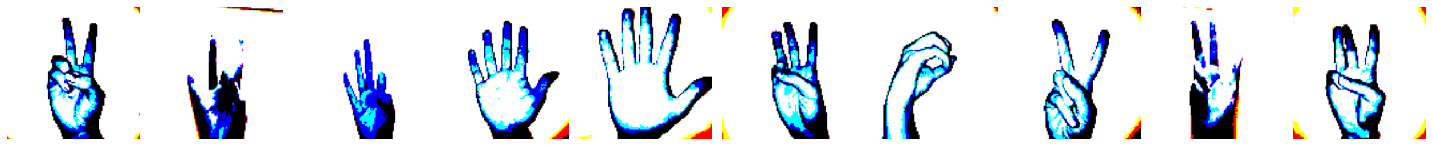

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [8]:
train_imgs, train_labels = next(train_batches)
plotImages(train_imgs)
print(train_labels)

## 2. Create a Convolutional Neural Network with TensorFlow's Keras API

In [9]:
pysical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(pysical_devices))

Num GPUs Available:  0


In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 10)                2007050   
Total params: 2,026,442
Trainable params: 2,026,442
Non-trainable params: 0
______________________________________________

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

## 3. Train a Convolutional Neural Network with TensorFlow's Keras API

In [13]:
X_train = train_batches
y_train = train_batches.classes

In [14]:
model.fit(x=X_train, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
136/136 - 45s - loss: 20.4242 - acc: 0.4397 - val_loss: 2.1453 - val_acc: 0.6222
Epoch 2/10
136/136 - 42s - loss: 0.4460 - acc: 0.8816 - val_loss: 1.5725 - val_acc: 0.7148
Epoch 3/10
136/136 - 45s - loss: 0.0924 - acc: 0.9647 - val_loss: 1.6922 - val_acc: 0.7074
Epoch 4/10
136/136 - 57s - loss: 0.0375 - acc: 0.9875 - val_loss: 1.2708 - val_acc: 0.7556
Epoch 5/10
136/136 - 58s - loss: 0.0039 - acc: 0.9993 - val_loss: 1.2070 - val_acc: 0.7593
Epoch 6/10
136/136 - 59s - loss: 5.1633e-04 - acc: 1.0000 - val_loss: 1.1945 - val_acc: 0.7519
Epoch 7/10
136/136 - 49s - loss: 2.8918e-04 - acc: 1.0000 - val_loss: 1.1943 - val_acc: 0.7556
Epoch 8/10
136/136 - 51s - loss: 2.1129e-04 - acc: 1.0000 - val_loss: 1.1962 - val_acc: 0.7556
Epoch 9/10
136/136 - 50s - loss: 1.6002e-04 - acc: 1.0000 - val_loss: 1.1971 - val_acc: 0.7556
Epoch 10/10
136/136 - 48s - loss: 1.2404e-04 - acc: 1.0000 - val_loss: 1.1981 - val_acc: 0.7481


## 4. Build a Test Set with TensorFlow's Keras API

In [15]:
# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\0')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\0') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\0')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\0')  
os.chdir('../../')

# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\1')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\1') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\1')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\1')  
os.chdir('../../')

# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\2')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\2') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\2')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\2')  
os.chdir('../../')

# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\3')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\3') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\3')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\3')  
os.chdir('../../')

# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\4')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\4') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\4')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\4')  
os.chdir('../../')

# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\5')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\5') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\5')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\5')  
os.chdir('../../')

# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\6')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\6') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\6')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\6')  
os.chdir('../../')

# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\7')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\7') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\7')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\7')  
os.chdir('../../')

# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\8')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\8') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\8')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\8')  
os.chdir('../../')

# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\9')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\9') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\9')
    
    for i in random.sample(glob.glob('*'), 27):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\9')  
os.chdir('../../')

In [16]:
test_path  = 'C:\\Users\\רועי\\\data\\Sign-Language-Digits-Dataset\\test'

In [17]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224),   classes=['0','1','2','3','4','5','6','7','8','9'], batch_size=10, shuffle=False)

Found 270 images belonging to 10 classes.


In [18]:
assert test_batches.n == 270
assert test_batches.num_classes == 10

## 5. Neural Network Predictions with TensorFlow's Keras API

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

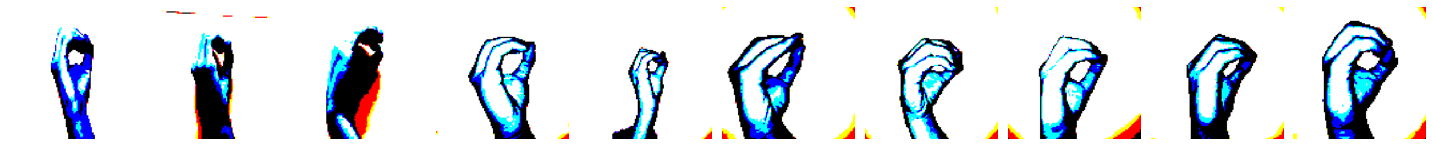

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [20]:
X_test = test_batches
y_test = test_batches.classes

In [21]:
predictions = model.predict(x=X_test, verbose=0)

In [22]:
for i in predictions:
    print(i)

[7.8439516e-01 8.0730356e-10 2.9523015e-05 1.7462780e-06 3.6688923e-04
 1.0049702e-05 2.1316570e-01 1.4485302e-04 1.8858418e-03 1.5896030e-07]
[9.9938250e-01 9.9461342e-12 2.8035427e-06 8.6506198e-08 1.3535034e-06
 5.4251126e-07 4.6391236e-07 5.7317143e-06 6.0644315e-04 3.0406465e-08]
[1.0000000e+00 2.5681295e-12 2.0741885e-12 1.7604265e-14 3.4499245e-14
 1.4255838e-12 1.2928342e-13 2.5913538e-12 8.8539523e-12 2.4314407e-17]
[9.9937361e-01 2.1124642e-15 6.5238363e-11 4.5872451e-16 1.6434119e-06
 1.4844467e-10 2.8977347e-08 2.3335137e-07 6.2452088e-04 1.6339040e-10]
[9.9999976e-01 1.1807560e-07 2.8698555e-08 3.8851775e-10 3.0853317e-15
 8.2610012e-14 4.2285156e-10 3.3668135e-10 8.1563307e-08 1.6138273e-08]
[1.0000000e+00 8.9956602e-24 8.8734164e-22 2.6447752e-18 4.3730244e-14
 1.2534930e-13 2.2725835e-11 3.3753350e-13 5.7499075e-11 1.1675173e-17]
[1.0000000e+00 4.5448599e-21 1.7428787e-15 1.5846383e-18 3.1544153e-16
 9.5612805e-21 2.0342356e-17 2.3152367e-15 1.8069138e-17 3.9713935e-13]

In [23]:
rounded_predictions = np.argmax(np.round(predictions), axis=-1)  

In [24]:
for i in rounded_predictions:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
1
6
0
0
0
8
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
0
6
6
1
2
1
2
2
2
2
2
2
6
3
1
2
2
2
2
7
2
1
3
0
5
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
0
3
3
3
3
3
3
3
3
4
8
4
0
6
4
4
4
7
7
4
0
4
4
4
4
4
9
4
6
6
6
4
4
4
4
4
0
5
9
5
5
5
5
5
5
5
5
5
5
5
5
3
5
5
5
5
5
5
5
5
5
5
5
7
8
2
4
4
6
6
6
6
6
6
2
6
6
4
6
6
6
6
6
6
2
6
2
6
7
6
7
0
7
7
4
7
7
4
4
7
7
7
4
7
7
0
7
7
7
7
7
7
7
7
7
7
7
1
0
8
8
9
8
8
8
8
8
8
8
8
4
8
0
8
8
8
8
8
8
8
8
9
8
0
9
9
9
7
9
9
9
9
9
4
3
9
9
9
9
9
9
9
9
3
8
9
8
9
9
9
9


## 6. Create a Confusion Matrix for Neural Network Predictions

In [25]:
y_pred=rounded_predictions

In [26]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[24  1  0  0  0  0  1  0  1  0]
 [ 0 26  0  1  0  0  0  0  0  0]
 [ 1  6 15  1  0  0  3  1  0  0]
 [ 2  0  0 23  0  1  1  0  0  0]
 [ 2  0  0  0 17  0  4  2  1  1]
 [ 1  0  0  1  0 24  0  0  0  1]
 [ 0  0  4  0  3  0 17  2  1  0]
 [ 2  0  0  0  4  0  0 21  0  0]
 [ 3  1  0  0  1  0  0  0 20  2]
 [ 0  0  0  2  1  0  0  1  2 21]]


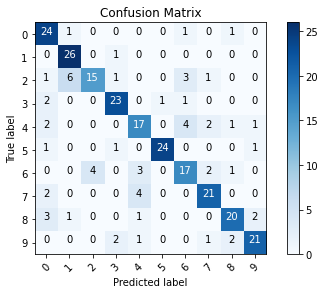

In [28]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [29]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm.sum()-(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9])),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  208 correct predictions.
 The result is telling us that we have:  62 incorrect predictions.
 We have a total predictions of:  270


## 7. Create a Classification Report for Neural Network Predictions

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.89      0.77        27
           1       0.76      0.96      0.85        27
           2       0.79      0.56      0.65        27
           3       0.82      0.85      0.84        27
           4       0.65      0.63      0.64        27
           5       0.96      0.89      0.92        27
           6       0.65      0.63      0.64        27
           7       0.78      0.78      0.78        27
           8       0.80      0.74      0.77        27
           9       0.84      0.78      0.81        27

    accuracy                           0.77       270
   macro avg       0.77      0.77      0.77       270
weighted avg       0.77      0.77      0.77       270



In [31]:
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of the Convolutional Neural Network model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("\nWell, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
accuracy = "{:.2%}".format(metrics.accuracy_score(y_test, y_pred))

Accuracy of the Convolutional Neural Network model: 77.04%

Well, you got a classification rate of 77.04%


In [32]:
#calculate Precision
print("Precision of the Convolutional Neural Network model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred, average='macro')))
print("\nPrecision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our model predicted a sign language digit image is of a particular digit, that image is actually of that image", "{:.2%}".format(metrics.precision_score(y_test, y_pred, average='macro')) ,"of the time.")

Precision of the Convolutional Neural Network model: 77.47%

Precision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our model predicted a sign language digit image is of a particular digit, that image is actually of that image 77.47% of the time.


In [33]:
#calculate Recall
print("Recall of the Convolutional Neural Network model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred, average='macro')))
print("\nRecall:If there is sign language digit image of a particular digit present in the test set - our model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred, average='macro')) ,"of the time.")

Recall of the Convolutional Neural Network model: 77.04%

Recall:If there is sign language digit image of a particular digit present in the test set - our model can identify it 77.04% of the time.


In [34]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, y_pred)

0.8724279835390947

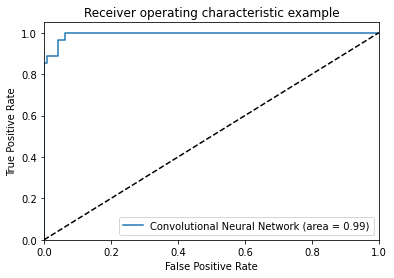

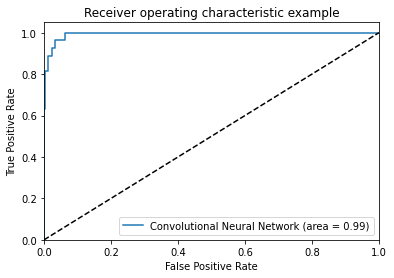

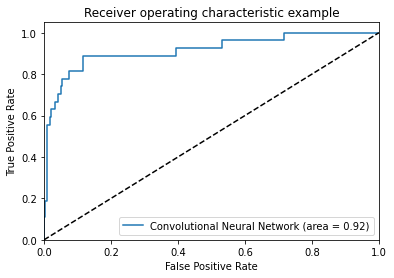

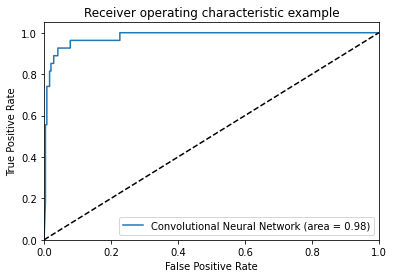

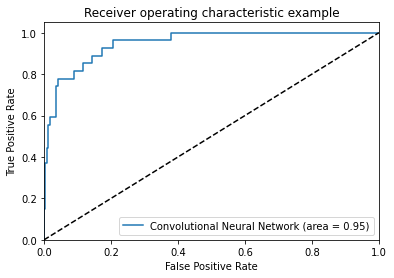

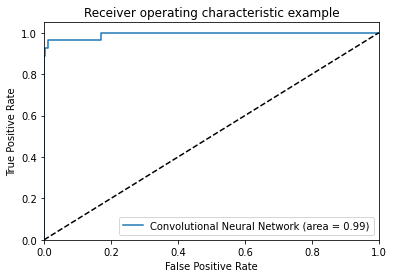

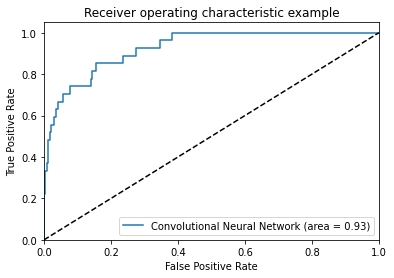

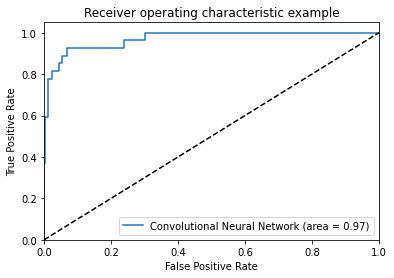

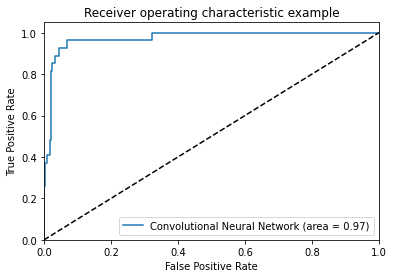

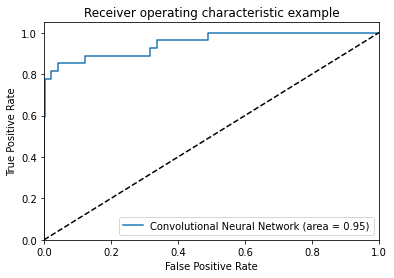

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_train = label_binarize(y_train, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = 10
y_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = 10

# classifier
y_score = model.predict(X_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='Convolutional Neural Network (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## 8. Deployment of the Convolutional Neural Network

In [36]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\real_time')
if os.path.isdir('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\pred') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\pred')
    for i in random.sample(glob.glob('*'), 1):
        shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\pred') 

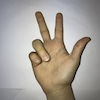

In [37]:
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\pred')
for i in random.sample(glob.glob('*'), 1):
    Image(filename=i)  

Image(filename=i)

In [38]:
pred_filenames = os.listdir("C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\pred")
pred_df = pd.DataFrame({'filename': pred_filenames})
nb_samples = pred_df.shape[0]
batch_size = 10
pred_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
pred_generator = pred_gen.flow_from_dataframe(pred_df, "C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\pred", 
                                              x_col='filename',
                                              y_col=None,
                                              class_mode=None,
                                              batch_size=batch_size,
                                              target_size=(224, 224),
                                              shuffle=False)

Found 1 validated image filenames.


In [39]:
X_pred = pred_generator
pred = model.predict(X_pred, verbose=0)
rounded_pred = np.argmax(np.round(pred), axis=-1) 
if rounded_pred[0] == 0:
    print("\033[1m The algorithm predicts, with accuracy (i.e., confidence level) of", accuracy, "that this is a sign language digit image of the digit 0")
elif rounded_pred[0] == 1:
    print("\033[1m The algorithm predicts, with accuracy (i.e., confidence level) of", accuracy, "that this is a sign language digit image of the digit 1")
elif rounded_pred[0] == 2:
    print("\033[1m The algorithm predicts, with accuracy (i.e., confidence level) of", accuracy, "that this is a sign language digit image of the digit 2")
elif rounded_pred[0] == 3:
    print("\033[1m The algorithm predicts, with accuracy (i.e., confidence level) of", accuracy, "that this is a sign language digit image of the digit 3")
elif rounded_pred[0] == 4:
    print("\033[1m The algorithm predicts, with accuracy (i.e., confidence level) of", accuracy, "that this is a sign language digit image of the digit 4")
elif rounded_pred[0] == 5:
    print("\033[1m The algorithm predicts, with accuracy (i.e., confidence level) of", accuracy, "that this is a sign language digit image of the digit 5")
elif rounded_pred[0] == 6:
    print("\033[1m The algorithm predicts, with accuracy (i.e., confidence level) of", accuracy, "that this is a sign language digit image of the digit 6")
elif rounded_pred[0] == 7:
    print("\033[1m The algorithm predicts, with accuracy (i.e., confidence level) of", accuracy, "that this is a sign language digit image of the digit 7")
elif rounded_pred[0] == 8:
    print("\033[1m The algorithm predicts, with accuracy (i.e., confidence level) of", accuracy, "that this is a sign language digit image of the digit 8")
else:
    print("\033[1m The algorithm predicts, with accuracy (i.e., confidence level) of", accuracy, "that this is a sign language digit image of the digit 9")

 The algorithm predicts, with accuracy (i.e., confidence level) of 77.04% that this is a sign language digit image of the digit 3


## 9. Save and Load a Model with TensorFlow's Keras API

### 1. model.save()

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 10)                2007050   
Total params: 2,026,442
Trainable params: 2,026,442
Non-trainable params: 0
______________________________________________

In [41]:
# Checks first to see if file exists already
# If not, the model is saved to disk.
import os.path
if os.path.isfile('C:\\Users\\רועי\\models\\sign_language_digits_model.h9') is False:
    model.save('C:\\Users\\רועי\\models\sign_language_digits_model.h9')

This save functions saves:
1. The architecture of the model allowing to re-create the moddel.
2. The weights of the model.
3. The training configuration (loss, optimizer).
4. The state of the optimizer, allowing to resume training exactly where you left off.

In [42]:
from tensorflow.keras.models import load_model
new_model = load_model('C:\\Users\\רועי\\models\\sign_language_digits_model.h9')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [43]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 10)                2007050   
Total params: 2,026,442
Trainable params: 2,026,442
Non-trainable params: 0
______________________________________________

In [44]:
new_model.get_weights()

[array([[[[ 0.0672067 , -0.06566494, -0.08850947, -0.02297985,
            0.0074609 ,  0.1196911 ,  0.00638986,  0.07704552,
           -0.11744843, -0.02887065,  0.08089577, -0.00144913,
            0.10756753, -0.12422702,  0.03552623, -0.0645935 ,
           -0.0121367 , -0.12403099,  0.12123438,  0.11400798,
           -0.01712661, -0.02541955, -0.00709075, -0.0719615 ,
            0.02541872, -0.12160353, -0.09715298, -0.09153607,
            0.11875553,  0.00309148,  0.11897452, -0.01808622],
          [ 0.03325587, -0.06339841,  0.13537745, -0.11256377,
            0.08263449, -0.12040972, -0.08766168,  0.13700941,
            0.09618331,  0.02591191,  0.02111536,  0.09916868,
           -0.05573285,  0.06999898,  0.01475394, -0.01526228,
           -0.01533596,  0.07547759, -0.06939583, -0.13878724,
            0.11538702, -0.05965655,  0.02276858, -0.06219549,
            0.13235731,  0.10599652, -0.01236846,  0.09199111,
            0.06998204,  0.10620846, -0.09179457, -0.0

In [45]:
new_model.optimizer

### 2. model.to_json()

if you only need to save architecture of a model, and not its weights or its training configuration, you can see the following function to save the architecture only.

In [46]:
# save as YAML
yaml_string = model.to_yaml()

# save as JSON
# json_string = model.to_json()

In [47]:
yaml_string

'backend: tensorflow\nclass_name: Sequential\nconfig:\n  layers:\n  - class_name: Conv2D\n    config:\n      activation: relu\n      activity_regularizer: null\n      batch_input_shape: !!python/tuple\n      - null\n      - 224\n      - 224\n      - 3\n      bias_constraint: null\n      bias_initializer:\n        class_name: Zeros\n        config:\n          dtype: float32\n      bias_regularizer: null\n      data_format: channels_last\n      dilation_rate: &id001 !!python/tuple\n      - 1\n      - 1\n      dtype: float32\n      filters: 32\n      kernel_constraint: null\n      kernel_initializer:\n        class_name: GlorotUniform\n        config:\n          dtype: float32\n          seed: null\n      kernel_regularizer: null\n      kernel_size: &id002 !!python/tuple\n      - 3\n      - 3\n      name: conv2d\n      padding: same\n      strides: *id001\n      trainable: true\n      use_bias: true\n  - class_name: MaxPooling2D\n    config:\n      data_format: channels_last\n      dtype:

In [48]:
# model reconstruction from YAML
from tensorflow.keras.models import model_from_yaml
model_architecture = model_from_yaml(yaml_string)

# model reconstruction from JSON:
# from tensorflow.keras.models import model_from_json
# model_architecture = model_from_json(json_string)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\saving\model_config.py:76: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(yaml_string)


In [49]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 10)                2007050   
Total params: 2,026,442
Trainable params: 2,026,442
Non-trainable params: 0
______________________________________________

### 3. model.save_weights()

If you only need to save the weights of the model, you cab use the following function save the weights only.

In [50]:
# Checks first to see if file exists already
# If not, the model is saved to disk.
import os.path
if os.path.isfile('C:\\Users\\רועי\\models\\sign_language_digits_model.h9') is False:
    model.save_weights('C:\\Users\\רועי\\models\\sign_language_digits_model.h9')

In [51]:
model2 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [52]:
model2.load_weights('C:\\Users\\רועי\\models\\sign_language_digits_model.h9')

ValueError: Shapes (200704, 2) and (200704, 10) are incompatible

In [ ]:
model2.get_weights()

# 10. Clean and Delete all the Directories

In [54]:
# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\0')
for i in random.sample(glob.glob('*'), 136):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\0')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\0')
os.chdir('../../')

# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\1')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\1') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\1')
for i in random.sample(glob.glob('*'), 136):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\1')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\1')
os.chdir('../../')

# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\2')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\2') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\2')
for i in random.sample(glob.glob('*'), 136):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\2')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\2')
os.chdir('../../')

# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\3')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\3') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\3')
for i in random.sample(glob.glob('*'), 136):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\3')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\3')
os.chdir('../../')

# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\4')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\4') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\4')
for i in random.sample(glob.glob('*'), 136):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\4')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\4')
os.chdir('../../')

# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\5')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\5') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\5')
for i in random.sample(glob.glob('*'), 136):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\5')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\5')
os.chdir('../../')

# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\6')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\6') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\6')
for i in random.sample(glob.glob('*'), 136):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\6')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\6')
os.chdir('../../')

# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\7')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\7') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\7')
for i in random.sample(glob.glob('*'), 136):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\7')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\7')
os.chdir('../../')

# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\8')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\8') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\8')
for i in random.sample(glob.glob('*'), 136):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\8')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\8')
os.chdir('../../')

# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\train\\9')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\9') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\9')
for i in random.sample(glob.glob('*'), 136):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\9')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\train\\9')
os.chdir('../../')

In [55]:
# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\0')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\0')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\0')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\1')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\1') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\1')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\1')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\1')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\2')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\2') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\2')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\2')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\2')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\3')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\3') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\3')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\3')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\3')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\4')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\4') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\4')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\4')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\4')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\5')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\5') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\5')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\5')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\5')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\6')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\6') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\6')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\6')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\6')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\7')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\7') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\7')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\7')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\7')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\8')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\8') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\8')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\8')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\8')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\9')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\9') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\9')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\9')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\valid\\9')
os.chdir('../../')

In [56]:
# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\0')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\0')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\0')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\1')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\1') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\1')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\1')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\1')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\2')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\2') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\2')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\2')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\2')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\3')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\3') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\3')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\3')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\3')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\4')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\4') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\4')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\4')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\4')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\5')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\5') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\5')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\5')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\5')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\6')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\6') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\6')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\6')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\6')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\7')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\7') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\7')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\7')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\7')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\8')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\8') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\8')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\8')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\8')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\test\\9')
if os.path.isdir('C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\9') is False:
    os.makedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\9')
for i in random.sample(glob.glob('*'), 27):
    shutil.move(i, 'C:\\Users\\רועי\\data\\Sign-Language-Digits-Dataset\\9')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\Sign-Language-Digits-Dataset\\test\\9')
os.chdir('../../')

In [53]:
# Delete data from pred directories
os.chdir('C:\\Users\\רועי\\data\\\Sign-Language-Digits-Dataset\\pred')
for i in random.sample(glob.glob('*'), 1):
    shutil.move(i, 'C:\\Users\\רועי\\data\\\Sign-Language-Digits-Dataset\\real_time')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\\Sign-Language-Digits-Dataset\\pred')